# Importing Required Libraries

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB

# Function to plot graph

In [6]:
def plotgraph(data_frame, algorithm) -> None:
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig = plt.figure(figsize=(7,7))
    colors = {"negative":"red", "positive":"green","neutral": "white"}
    wp = {'linewidth':2, 'edgecolor':"black"}
    tags = data_frame['sentiment'].value_counts()
    explode = (0.1, 0.1, 0.1)
    colors = [colors.get(sentiment, 'gray') for sentiment in tags.index]
    pie_chart=tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
    startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'black'},
    explode=None, label='')
    pie_chart.legend(labels=tags.index, loc='best', bbox_to_anchor=(0.95, 0.95))
    plt.title(f'Distribution of sentiments for {algorithm}')

# Loading the data

In [7]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv(r'demonitization.csv')

In [8]:
train_data.head()

,Tweet,sentiment
0,@united UA5396 can wait for me. I'm on the gro...,negative
1,I hate Time Warner! Soooo wish I had Vios. Can...,negative
2,"@united Oh, we are sure it's not planned, but ...",negative
3,Tom Shanahan's latest column on SDSU and its N...,neutral
4,Found the self driving car!! /IWo3QSvduneutral,neutral


In [9]:
test_data.head()

,Unnamed: 0,Date,User,Tweet
0,0,2017-06-29 12:37:02+00:00,grdsatya,Why create a panic everytime.. can't be there ...
1,1,2017-06-29 12:27:29+00:00,cagauravgupta,Everyone in India would not do their job this ...
2,2,2017-06-29 12:09:26+00:00,buzzRashmi,"After #Demonitization ,#GST may mean a huge bl..."
3,3,2017-06-29 07:09:02+00:00,Writingkeeeda,#GST @PMOIndia people were told that loans wil...
4,4,2017-06-29 04:20:58+00:00,ninadsheth,#realestate prices in Indian hill stations are...


# Preprocessing function

In [10]:
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())

    # Remove stopwords and stem remaining words
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    # Join stemmed tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Drop NaN values

In [11]:
train_data = train_data.dropna()
test_data = test_data.dropna()

# Preprocess data

In [12]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
train_data['Tweet'] = train_data['Tweet'].apply(preprocess_text)
test_data['Tweet'] = test_data['Tweet'].apply(preprocess_text)

In [13]:
train_data.head()

,Tweet,sentiment
0,@ unit ua5396 wait . 'm ground tri get gate mo...,negative
1,hate time warner ! soooo wish vio . cant watch...,negative
2,"@ unit oh , sure 's plan , occur absolut consi...",negative
3,tom shanahan 's latest column sdsu ncaa baseba...,neutral
4,found self drive car ! ! /iwo3qsvduneutr,neutral


In [14]:
test_data.head()

,Unnamed: 0,Date,User,Tweet
0,0,2017-06-29 12:37:02+00:00,grdsatya,creat panic everytim .. ca n't proper plan ......
1,1,2017-06-29 12:27:29+00:00,cagauravgupta,"everyon india would job week tell , 's # gstro..."
2,2,2017-06-29 12:09:26+00:00,buzzRashmi,"# demonit , # gst may mean huge blow peopl uno..."
3,3,2017-06-29 07:09:02+00:00,Writingkeeeda,# gst @ pmoindia peopl told loan cheaper aftr ...
4,4,2017-06-29 04:20:58+00:00,ninadsheth,# realest price indian hill station catastroph...


# Extract features

In [15]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['Tweet'])
X_test = vectorizer.transform(test_data['Tweet'])
y_train = train_data['sentiment']

# Train Model for Naive Bayes

In [16]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# Evaluate model on test data

In [17]:
y_pred = model.predict(X_test)

# Save predictions to a file

In [18]:
# Create a new DataFrame with 'sentiment' column
result_data_nb = pd.concat([test_data, pd.DataFrame({'sentiment': y_pred})], axis=1)

# Save the DataFrame to a CSV file
result_data_nb.to_csv('twitter_sentiment_nb_predictions.csv', index=False)

In [19]:
result_data_nb.head()

,Unnamed: 0,Date,User,Tweet,sentiment
0,0,2017-06-29 12:37:02+00:00,grdsatya,creat panic everytim .. ca n't proper plan ......,negative
1,1,2017-06-29 12:27:29+00:00,cagauravgupta,"everyon india would job week tell , 's # gstro...",positive
2,2,2017-06-29 12:09:26+00:00,buzzRashmi,"# demonit , # gst may mean huge blow peopl uno...",negative
3,3,2017-06-29 07:09:02+00:00,Writingkeeeda,# gst @ pmoindia peopl told loan cheaper aftr ...,negative
4,4,2017-06-29 04:20:58+00:00,ninadsheth,# realest price indian hill station catastroph...,negative


# Train the SVM algorithm

In [20]:
svm = SVC(kernel='linear', decision_function_shape='ovr', random_state=0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predict the sentiments of the unlabelled data using the trained SVM algorithm

In [21]:
y_unlabelled = svm.predict(X_test)

# Save predictions to a file

In [22]:
# Create a new DataFrame with 'sentiment' column
result_data_svm = pd.concat([test_data, pd.DataFrame({'sentiment': y_unlabelled})], axis=1)

# Save the DataFrame to a CSV file
result_data_svm.to_csv('twitter_sentiment_svm_predictions.csv', index=False)

In [23]:
result_data_svm.head()

,Unnamed: 0,Date,User,Tweet,sentiment
0,0,2017-06-29 12:37:02+00:00,grdsatya,creat panic everytim .. ca n't proper plan ......,neutral
1,1,2017-06-29 12:27:29+00:00,cagauravgupta,"everyon india would job week tell , 's # gstro...",positive
2,2,2017-06-29 12:09:26+00:00,buzzRashmi,"# demonit , # gst may mean huge blow peopl uno...",negative
3,3,2017-06-29 07:09:02+00:00,Writingkeeeda,# gst @ pmoindia peopl told loan cheaper aftr ...,negative
4,4,2017-06-29 04:20:58+00:00,ninadsheth,# realest price indian hill station catastroph...,neutral


# Naive Bayes Graph

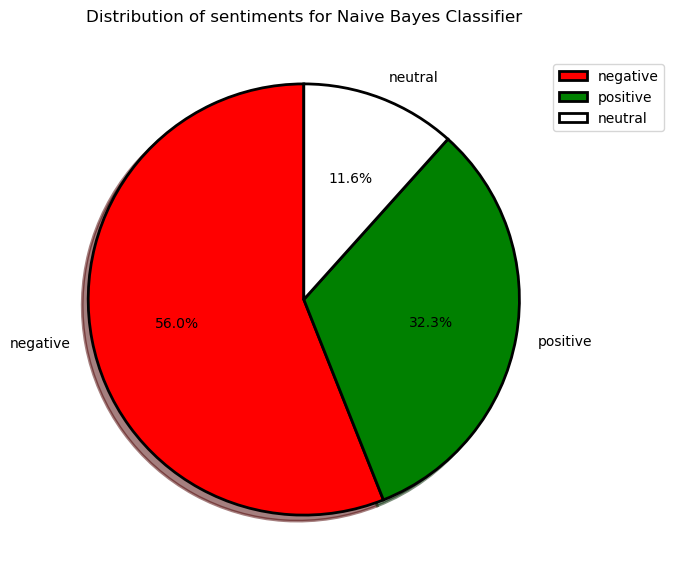

In [24]:
plotgraph(result_data_nb, 'Naive Bayes Classifier')

# Support Vector Graph

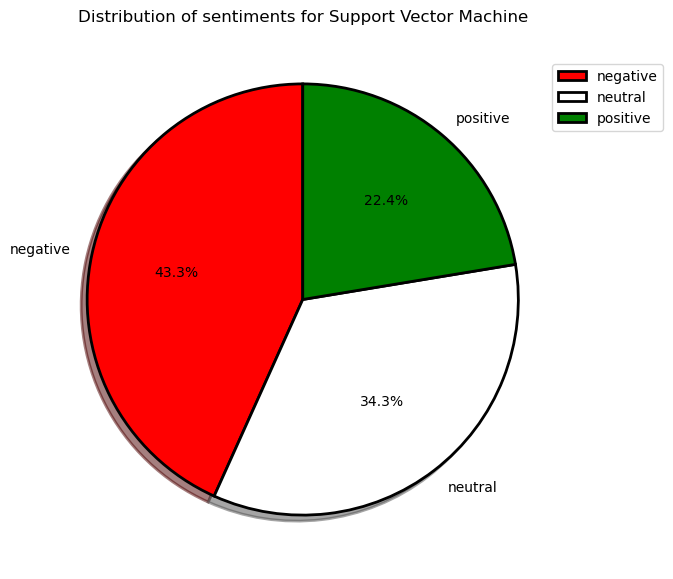

In [25]:
plotgraph(result_data_svm, 'Support Vector Machine')